In [2]:
import numpy as np
import torch.autograd


from autograd import grad, jacobian, hessian 
import matplotlib.pyplot as plt

Consider the Rosenbrock function
$$
R(x_1,x_2) = (x_1-a)^2 + b(x_1^2 - x_2)^2,
$$
which has $x^\star := (a,a^2)$ as its global minimizer, where $R$ takes the value $0$.

In [3]:
# Parameters for Rosenbrock function
a = 1
b = 1
# play around with b =10, in this step, take smaller stepsize and more iterations are need to solve the optimization problem

# Define Rosenbrock function
def R0(x1,x2):
  return (x1-a)**2 + b*(x2-x1**2)**2

# Define Rosenbrock function on vector input
def R(x):
  return R0(x[0],x[1])

Next we show a contour plot for the Rosenbrock function.

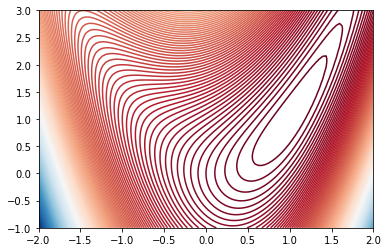

In [4]:
# plot Rosenbrock function
ng = 100
x1 = np.linspace(-2.0,2.0,ng)
x2 = np.linspace(-1.0,3.0,ng)
X1,X2 = np.meshgrid(x1, x2)
Z = R0(X1, X2)
im = plt.contour(X1,X2,Z,200,cmap=plt.cm.RdBu)

Next we show how to use automatic differentiation tools to define functions that evaluate the gradient and Hessian of R.

In [5]:
# define gradient and Hessian
# gradR(x) and hessR(x) return gradient vector and Hessian matrix of R at x
gradR = grad(R)
hessR = hessian(R)


In [13]:
gradR(x)

array([-6.5, -0.5])

In [12]:
x = np.array([-1.5,2.0])

Next we implement gradient descent.

In [9]:
eps = 5e-2        # step size
maxIter = 10000   # maximum number of grad descent iterations
convTol = 1e-8   # convergence tolerance (stop)

x_gd_iterates = np.zeros((2,maxIter)) #store the history of iteration
R_gd_iterates = np.zeros(maxIter) # store the corresponding value of each iteration

x = np.array([-1.5,2.0]) # initialization
R_prev = R(x) 

# main gradient descent loop 
for iter in range(maxIter):

  x = x - eps * gradR(x)              # update x
  x_gd_iterates[:,iter] = x         # store update
  R_current = R(x)                  # evaluate current value of objective
  R_gd_iterates[iter] = R_current   # store current value of objective
  
  # if the objective is not changing much, terminate the loop
  if np.sqrt(np.abs(R_current - R_prev)) <= eps*convTol:
    maxIter = iter+1
    break
  R_prev = R_current

# error is quadratic
# change sizes of stored arrays to reflect how many iterations actually happened
x_gd_iterates = x_gd_iterates[:,:maxIter]
R_gd_iterates = R_gd_iterates[:maxIter]

Then we assess the convergence of the objective function to the optimal value of 0 by plotting $R(x^j)$.

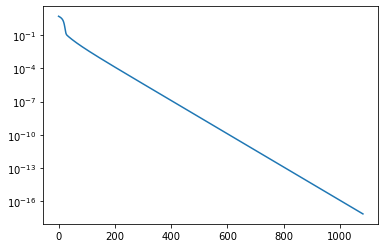

In [9]:
R_gd_plot = plt.semilogy(R_gd_iterates);
plt.show(R_gd_plot)
# convergence is linear

We also assess the convergence of the gradient descent iterates to the optimizer $x^\star := (a,a^2)$ by plotting $\Vert x^j - x^\star \Vert$, as well as a scatter plot of the iterates $x^j$ superimposed on the contour plot for $R$.

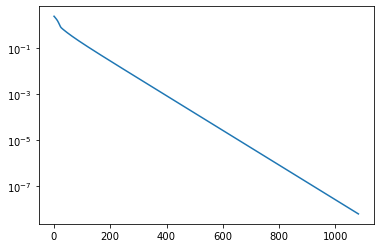

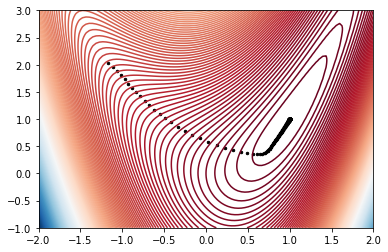

In [13]:
x_opt = np.reshape(np.array([a,a**2]),(2,1))
x_err_gd_plot = plt.semilogy( np.sqrt(np.sum((x_gd_iterates-x_opt)**2,0)) )
plt.show(x_err_gd_plot)

x_gd_plot = plt.contour(X1,X2,Z,200,cmap=plt.cm.RdBu)
plt.scatter(x_gd_iterates[0,:],x_gd_iterates[1,:],s=6,c="black")
plt.show(x_gd_plot)

Next we implement Newton's method.

In [10]:
maxIter = 100     # maximum number of grad descent iterations
convTol = 1e-8   # convergence tolerance (stop)

x_newt_iterates = np.zeros((2,maxIter))
R_newt_iterates = np.zeros(maxIter)

x = np.array([-1.5,2.0]) # initialization
R_prev = R(x)

# main Newton loop 
for iter in range(maxIter):

  H = hessR(x)
  x = x - np.linalg.solve(H,gradR(x))   # update x  x_k+1 = x_k - (H(x))^(-1) * gradR(x)
  x_newt_iterates[:,iter] = x             # store update
  R_current = R(x)                      # evaluate current value of objective
  R_newt_iterates[iter] = R_current       # store current value of objective
  
  # if the objective is not changing much, terminate the loop
  if np.sqrt(np.abs(R_current - R_prev)) <= eps*convTol:
    maxIter = iter+1
    break
  R_prev = R_current

# change sizes of stored arrays to reflect how many iterations actually happened
x_newt_iterates = x_newt_iterates[:,:maxIter]
R_newt_iterates = R_newt_iterates[:maxIter]

Then we plot the convergence of the objective $R(x^j)$.

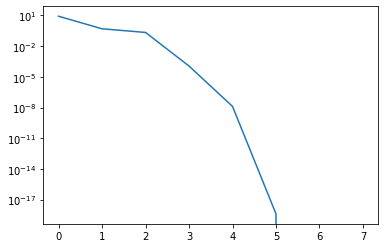

In [11]:
R_newt_plot = plt.semilogy(R_newt_iterates);
plt.show(R_newt_plot)

Finally we plot $\Vert x^j - x^\star \Vert$ to assess the convergence of the iterates.

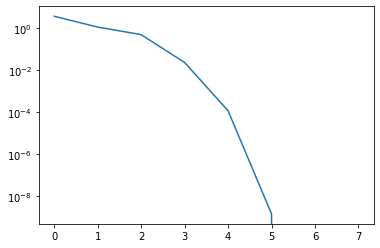

In [14]:
x_err_newt_plot = plt.semilogy( np.sqrt(np.sum((x_newt_iterates-x_opt)**2,0)) )
plt.show(x_err_newt_plot)